In [ ]:
%cd /content/drive/MyDrive/cnn_embed/cnn_manifold

/content/drive/MyDrive/cnn_embed/cnn_manifold


In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow.compat.v2 as tf


# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=6576,
    splits={
        'train': 6563,
        'val': 13,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)



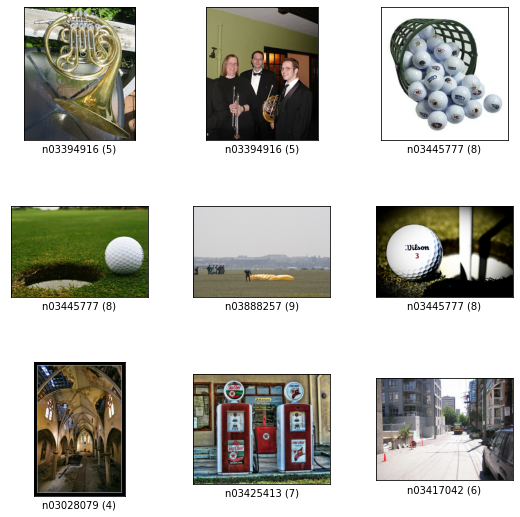

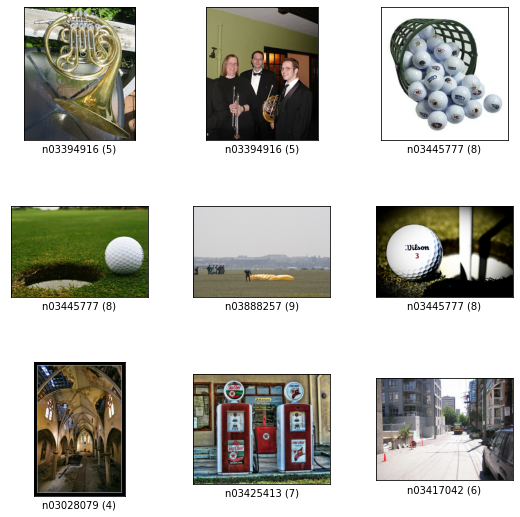

In [ ]:
import tensorflow_datasets as tfds
builder = tfds.ImageFolder('imagenette/')
print(builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset(split='train', shuffle_files=True)
tfds.show_examples(ds, builder.info)

In [ ]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
from keras.models import model_from_json
from keras.preprocessing import image

page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")
print(page.content)

# BeautifulSoup is an HTML parsing library

soup = BeautifulSoup(page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
#print(soup)
#print(soup.prettify())

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

In [ ]:
#code part 1.1
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")
print(bikes_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm2.static.flickr.com/1089/537335018_9813e94757.jpg\r\nhttp://members.lycos.nl/zwawe/hpbimg/fiets3.jpg\r\nhttp://communities.canada.com/shareit/photos/bicycles/images/64838/425x286.aspx\r\nhttp://farm2.static.flickr.com/1090/1441125154_341230126c.jpg\r\nhttp://farm4.static.flickr.com/3219/2681908945_dbe4c38deb.jpg\r\nhttp://farm3.static.flickr.com/2186/2358375851_fa98bf5314.jpg\r\nhttp://farm3.static.flickr.com/2375/2463989860_28a9d6743c.jpg\r\nhttp://bluh.nl/images/portfolio/grafisch/fiets.jpg\r\nhttp://www.bakkeveen.nl/Ondernemers/Bolhuis/2003_3_22_A.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/a/a1/A_Bicycle_in_Oxford.JPG\r\nhttp://farm1.static.flickr.com/220/503379999_8301b3ed00.jpg\r\nhttp://farm3.static.flickr.com/2266/2539943000_005b996b1e.jpg\r\nhttp://home.kooee.com.au/nobananas/images/clayton-bike-1.jpg\r\nhttp://farm1.static.flickr.com/21/26188741_0a4a18d992.jpg\r\nhttp://farm3.static.flickr.com/2085/1642604624_4ca84a32c4.jpg\r\nhttp://www.bikeracks.us/ima

In [ ]:
#code part 2
str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))#print the length of the list so you know how many urls you have

1262


In [ ]:
#code part 2.2
bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(bikes_split_urls))

1345


In [ ]:

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

n_of_training_images=100#the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None
        
        
#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes   

0
20
40
60
80
0
20
40
60
80
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg   img23.jpg  img35.jpg  img4.jpg   img62.jpg  img76.jpg  img92.jpg
img10.jpg  img24.jpg  img37.jpg  img50.jpg  img63.jpg  img77.jpg  img93.jpg
img11.jpg  img25.jpg  img39.jpg  img51.jpg  img64.jpg  img78.jpg  img94.jpg
img12.jpg  img26.jpg  img3.jpg	 img52.jpg  img65.jpg  img7.jpg   img95.jpg
img14.jpg  img27.jpg  img40.jpg  img53.jpg  img66.jpg  img80.jpg  img96.jpg
img15.jpg  img28.jpg  img42.jpg  img54.jpg  img67.jpg  img83.jpg  img97.jpg
img16.jpg  img29.jpg  img43.jpg  img55.jpg  img68.jpg  img84.jpg  img98.jpg
img17.jpg  img2.jpg   img44.jpg  img56.jpg  img69.jpg  img85.jpg  img99.jpg
img18.jpg  img30.jpg  img45.jpg  img57.jpg  img6.jpg   img86.jpg  img9.jpg
img19.jpg  img31.jpg  img46.jpg  img58.jpg  img72.jpg  img87.jpg
img1.jpg   img32.jpg  img47.jpg  img59.jpg  img73.jpg  img89.jpg
img20.jpg  img33.jpg  img48.jpg  img5.jpg   img74.jpg  img8.jpg
img21.jpg  img34.jpg  img49.jp

#2 Train a Keras Neural Network With ImageNet Synsets in Google Colaboratory

In [ ]:
#code part 5
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen  = ImageDataGenerator()
test_datagen = ImageDataGenerator()
    
train_generator = train_datagen.flow_from_directory(
        '/content/train/',
        target_size=(img_rows, img_cols),#The target_size is the size of your input images,every image will be resized to this size
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(img_rows, img_cols),#The target_size is the size of your input images,every image will be resized to this size
        batch_size=32,
        class_mode='categorical')

model2 = Sequential()
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
#--------------------------
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
#--------------------------
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))
model2.summary()#prints the summary of the model that was created

model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model2.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=65, validation_data=validation_generator
        )

Found 166 images belonging to 2 classes.
Found 89 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 4)         112       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 8)         296       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 4)         292       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 8)         296       
_____________________________________________________________

#Save the trained Model Using JSON and upload to google drive

In [ ]:
# serialize model to JSON
model_json = model2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#check the names of the files and use them to upload to drive
!ls

datalab  model.h5  model.json  train  validation


In [ ]:
!pip install -U -q PyDrive

## Use if you want to upload a file

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# file: string (name of existing file)
# title: string (name which you want to give to the file being uploaded to Drive)
# returns the file_id of the uploaded file on Drive
def upload_file_to_drive(file, title):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  export = drive.CreateFile({'title':title})  
  export.SetContentFile(file)
  export.Upload()

  return export['id']  

In [ ]:
file_id = upload_file_to_drive('model.json', 'model.json')

## Use if you want to download a file

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# file_id: string (id of the file you want to download)
# title: string (name which you want to give to the file being downloaded)
def download_file_from_drive(file_id, title):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  
  download = drive.CreateFile({'id': file_id})
  download.GetContentFile(title)

In [ ]:
model=download_file_from_drive('1-LVRt-s7hC632G3Dh18_-1PqUppW9vf5', 'model.h5')
weights=download_file_from_drive('1rB1hEVdwtqbXqf5SUfXMjaq87B3GbIbY', 'model.json')
!ls

adc.json  datalab  model.h5  model.json  sample_data  train  validation


#compile pretrained JSON model

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


#Test the Trained Model

In [ ]:
#code part 6
#create directory to store a .jpg image to recognize
!mkdir /content/recognize

def url_to_image(url):
  # download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  I = image
  if (len(I.shape))==3: #check if the image has width, length and channels, as I found some withouth channel
    save_path = '/content/recognize/img1.jpg'
    cv2.imwrite(save_path,I)
	# return the image
  return image

actual_image = url_to_image('https://www.jsea.or.jp/wp/wp-content/themes/nihon_senpaku/img/top/img02.jpg')# enter the url of the .jpg image

img_path = '/content/recognize/img1.jpg'
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#preds = model2.predict(x)
preds = loaded_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])



mkdir: cannot create directory ‘/content/recognize’: File exists
Probability that the image is a Bicycle: 0.0
Probability that the image is a Ship: 1.0


In [ ]:
#check if the image was stored on the directory
!ls /content/recognize


img1.jpg
